In [47]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import math
# Loading your IBM Q account(s)
IBMQ.load_accounts()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqprovider.py:269: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


In [ ]:
backend = Aer.get_backend("qasm_simulator")

In [42]:
def bin_expansion(circ, q, N):
    """Places q of |0> into binary expansion of N"""
    for i in range(N + 1):
#     while N >= 0:
        if N & (1 << i):
            circ.x(q[i])

In [43]:
q = QuantumRegister(5, 'x')
c = ClassicalRegister(5, 'y')
qc = QuantumCircuit(q, c)

In [44]:
bin_expansion(qc, q, 5)
for i in range(5):
    qc.measure(q[i], c[i])

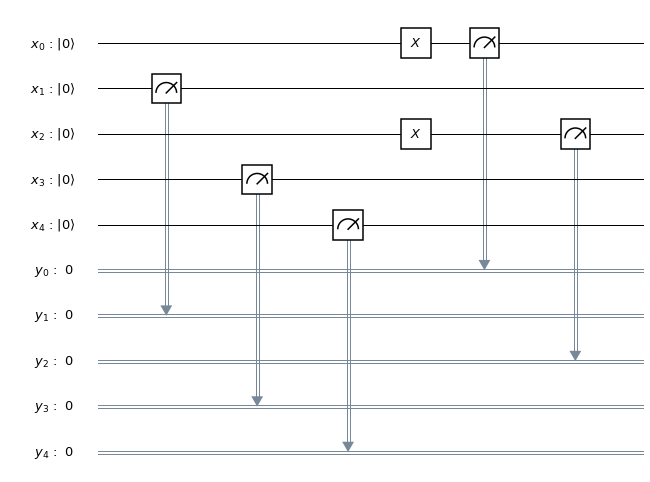

In [45]:
qc.draw()

In [48]:
simulate = execute(qc, backend=backend, shots=1024).result()

In [21]:
def raw_bin_exp(N):
    place_mask = 1
    bins = []
#     more_digits = True
    while place_mask <= N:
#     while N >= 0:
        if N & place_mask:
            bins = [1] + bins
        else:
            bins = [0] + bins
#         place += 1
        place_mask = place_mask * 2
#         more_digits
    if bins == []:
        bins = [0]
    return bins

In [49]:
simulate.get_counts()

{'00101': 1024}